In [1]:
import model_functions as mf
import pandas as pd
import seaborn as sns
from sklearn.naive_bayes import BernoulliNB

PBP_DF = pd.read_csv("data/play_by_play_parsed.csv")
BLUE   = sns.color_palette()[0]
ORANGE = sns.color_palette()[1]
GREEN  = sns.color_palette()[2]
RED    = sns.color_palette()[3]

Training Accuracy: 0.64924	Validation Accuracy:0.64739


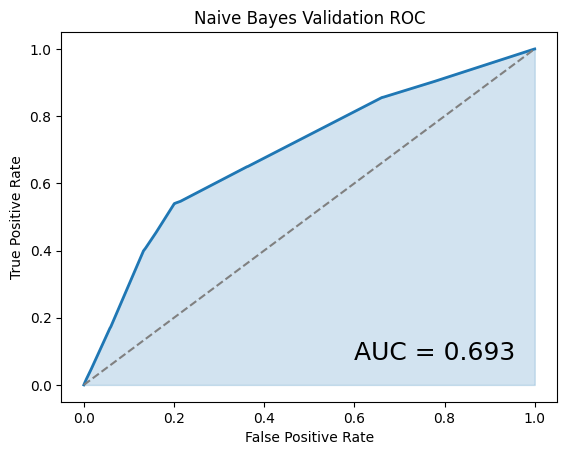

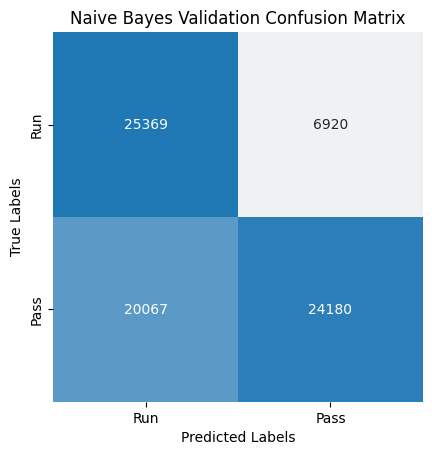

In [3]:
(train_X, train_y), (val_X, val_y), (test_X, test_y) = mf.split_data(PBP_DF)
basic_model = BernoulliNB()
basic_model.fit(train_X, train_y)

train, validation = mf.accuracies(basic_model, train_X, train_y, val_X, val_y)
print(f"Training Accuracy: {train:.5f}\tValidation Accuracy:{validation:.5f}")

mf.plot_roc(basic_model, val_X, val_y, color=BLUE, title="Naive Bayes Validation ROC")
mf.plot_confusion_matrix(basic_model, val_X, val_y, color=BLUE, title="Naive Bayes Validation Confusion Matrix")

Training Accuracy: 0.66781	Validation Accuracy:0.66864


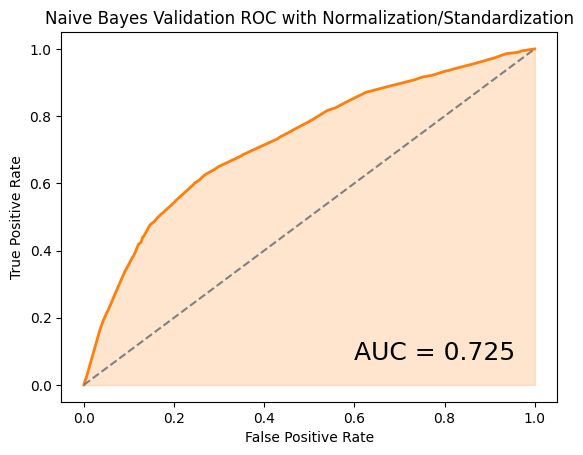

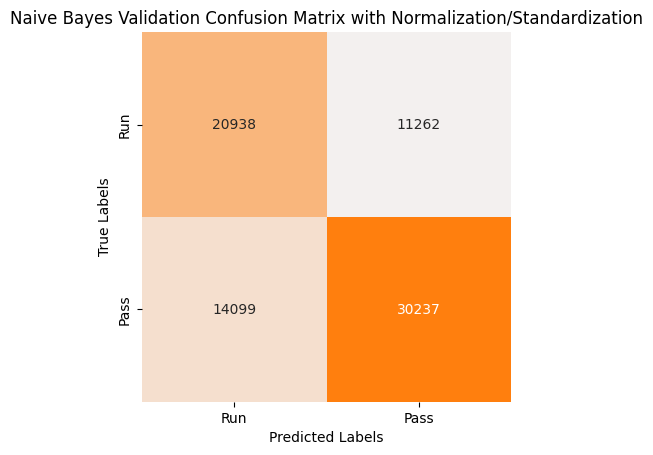

In [4]:
(train_X, train_y), (val_X, val_y), (test_X, test_y) = mf.split_data(PBP_DF, normalize=True, standardize=True)
feature_engineered_model = BernoulliNB()
feature_engineered_model.fit(train_X, train_y)

train, validation = mf.accuracies(feature_engineered_model, train_X, train_y, val_X, val_y)
print(f"Training Accuracy: {train:.5f}\tValidation Accuracy:{validation:.5f}")

mf.plot_roc(feature_engineered_model, val_X, val_y, color=ORANGE, title="Naive Bayes Validation ROC with Normalization/Standardization")
mf.plot_confusion_matrix(feature_engineered_model, val_X, val_y, color=ORANGE, title="Naive Bayes Validation Confusion Matrix with Normalization/Standardization")

Training Accuracy: 0.66902	Validation Accuracy:0.66869


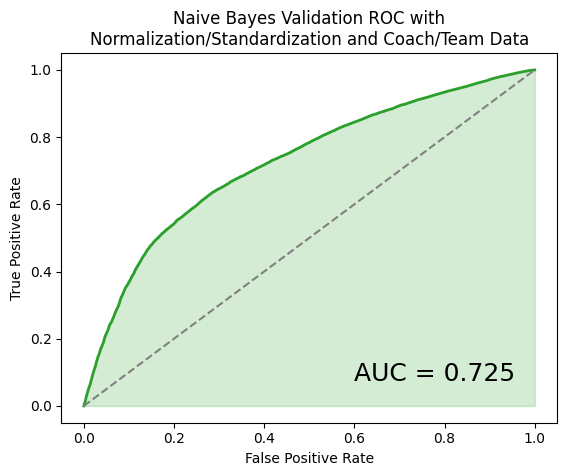

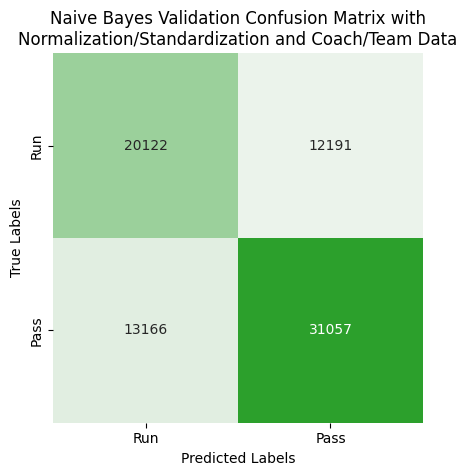

In [5]:
(train_X, train_y), (val_X, val_y), (test_X, test_y) = mf.split_data(PBP_DF, id_info=True, normalize=True, standardize=True)
identity_model = BernoulliNB()
identity_model.fit(train_X, train_y)

train, validation = mf.accuracies(identity_model, train_X, train_y, val_X, val_y)
print(f"Training Accuracy: {train:.5f}\tValidation Accuracy:{validation:.5f}")

mf.plot_roc(identity_model, val_X, val_y, color=GREEN, title="Naive Bayes Validation ROC with\nNormalization/Standardization and Coach/Team Data")
mf.plot_confusion_matrix(identity_model, val_X, val_y, color=GREEN, title="Naive Bayes Validation Confusion Matrix with\nNormalization/Standardization and Coach/Team Data")

Training Accuracy: 0.67601	Validation Accuracy:0.66740


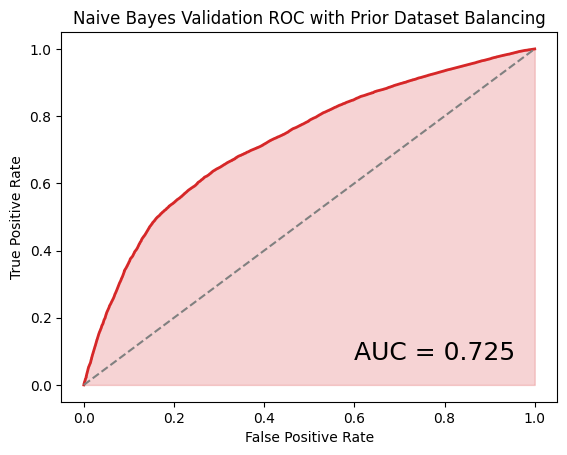

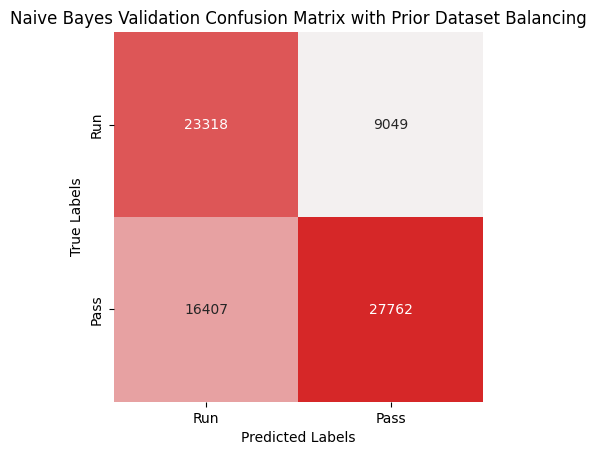

In [6]:
(train_X, train_y), (val_X, val_y), (test_X, test_y) = mf.split_data(PBP_DF, balance=True, id_info=True, normalize=True, standardize=True)
balanced_model = BernoulliNB()
balanced_model.fit(train_X, train_y)

train, validation = mf.accuracies(balanced_model, train_X, train_y, val_X, val_y)
print(f"Training Accuracy: {train:.5f}\tValidation Accuracy:{validation:.5f}")

mf.plot_roc(balanced_model, val_X, val_y, color=RED, title="Naive Bayes Validation ROC with Prior Dataset Balancing")
mf.plot_confusion_matrix(balanced_model, val_X, val_y, color=RED, title="Naive Bayes Validation Confusion Matrix with Prior Dataset Balancing")

In [7]:
import pickle
with open("models/naive_bayes.model", "wb") as pickle_out:
    pickle.dump(identity_model, pickle_out)